In [26]:
import os
import numpy as np
import nibabel as nib
from scipy.ndimage import zoom
import cv2

# Define paths
dataset_path = "D:/kits23/windowed_images/"  # Path to your input images
output_path = "D:/kits23/resampled_and_sliced_images"  # Path to save resampled and sliced images
os.makedirs(output_path, exist_ok=True)

def resample_image(image, original_spacing, target_spacing=(1.0, 1.0, 1.0)):
    """
    Resample the image to ensure uniform voxel spacing.
    :param image: 3D numpy array of the image data.
    :param original_spacing: Original voxel spacing as a tuple (x, y, z).
    :param target_spacing: Desired target spacing as a tuple (x, y, z).
    :return: Resampled 3D numpy array.
    """
    # Compute the resize factors for each axis
    resize_factors = np.array(original_spacing) / np.array(target_spacing)
    new_shape = np.round(np.array(image.shape) * resize_factors).astype(int)
    
    # Rescale the image
    resampled_image = zoom(image, resize_factors, order=1)
    return resampled_image

def slice_image(image, target_size=(512, 512)):
    """
    Convert 3D volumes into 2D slices and resize to 512x512.
    :param image: 3D numpy array of the image data.
    :param target_size: Desired target size for each slice (default 512x512).
    :return: List of 2D slices (each slice is a 512x512 array).
    """
    slices = []
    for i in range(image.shape[0]):  # Iterate through each slice (along the first axis)
        slice_2d = image[i, :, :]
        # Resize the slice to the target size (512x512)
        resized_slice = cv2.resize(slice_2d, target_size, interpolation=cv2.INTER_LINEAR)
        slices.append(resized_slice)
    return np.array(slices)

def process_images(dataset_path, output_path, target_spacing=(1.0, 1.0, 1.0), target_size=(512, 512)):
    """
    Process the images in the dataset by resampling and slicing.
    :param dataset_path: Path to the input dataset.
    :param output_path: Path to save processed images.
    :param target_spacing: Desired voxel spacing (default is 1.0 mm).
    :param target_size: Desired slice size (default is 512x512).
    """
    for case_folder in sorted(os.listdir(dataset_path)):
        case_path = os.path.join(dataset_path, case_folder)
        
        # Ensure that we only process .nii.gz files
        if not case_folder.endswith('.nii.gz'):
            continue

        print(f"Processing {case_folder}...")
        
        # Load the image
        imaging_obj = nib.load(case_path)
        imaging_data = imaging_obj.get_fdata()

        # Get the original spacing (assuming the spacing is uniform in x, y, and z directions)
        original_spacing = imaging_obj.header.get_zooms()[:3]

        # Resample the image to the target spacing
        resampled_data = resample_image(imaging_data, original_spacing, target_spacing)

        # Convert the 3D volume into 2D slices and resize to 512x512
        slices = slice_image(resampled_data, target_size)

        # Save the processed slices as a new NIfTI file
        output_file = os.path.join(output_path, f"{case_folder}_resampled_and_sliced.nii.gz")
        slices_nifti = nib.Nifti1Image(slices, affine=imaging_obj.affine)
        nib.save(slices_nifti, output_file)

        print(f"Processed and saved {case_folder}_resampled_and_sliced.nii.gz")

# Run the processing function
process_images(dataset_path, output_path)


Processing case_00000_windowed.nii.gz...
Processed and saved case_00000_windowed.nii.gz_resampled_and_sliced.nii.gz
Processing case_00001_windowed.nii.gz...
Processed and saved case_00001_windowed.nii.gz_resampled_and_sliced.nii.gz
Processing case_00002_windowed.nii.gz...
Processed and saved case_00002_windowed.nii.gz_resampled_and_sliced.nii.gz
Processing case_00003_windowed.nii.gz...
Processed and saved case_00003_windowed.nii.gz_resampled_and_sliced.nii.gz
Processing case_00004_windowed.nii.gz...
Processed and saved case_00004_windowed.nii.gz_resampled_and_sliced.nii.gz
Processing case_00005_windowed.nii.gz...
Processed and saved case_00005_windowed.nii.gz_resampled_and_sliced.nii.gz
Processing case_00006_windowed.nii.gz...
Processed and saved case_00006_windowed.nii.gz_resampled_and_sliced.nii.gz
Processing case_00007_windowed.nii.gz...
Processed and saved case_00007_windowed.nii.gz_resampled_and_sliced.nii.gz
Processing case_00008_windowed.nii.gz...
Processed and saved case_00008_

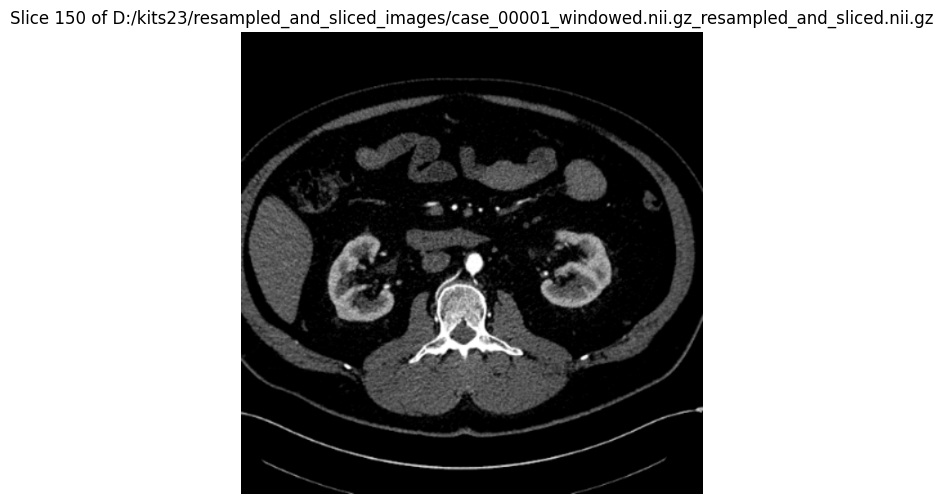

In [36]:
import nibabel as nib
import matplotlib.pyplot as plt

# Define the path to one of the processed files
case_file = "D:/kits23/resampled_and_sliced_images/case_00001_windowed.nii.gz_resampled_and_sliced.nii.gz"

# Load the NIfTI file
nifti_obj = nib.load(case_file)
slices_data = nifti_obj.get_fdata()

# Visualize a single slice
slice_index = slices_data.shape[0] // 2  # Pick the middle slice for visualization
slice_data = slices_data[slice_index, :, :]  # Extract the 2D slice

# Plot the slice
plt.figure(figsize=(6, 6))
plt.imshow(slice_data, cmap="gray")
plt.title(f"Slice {slice_index} of {case_file}")
plt.axis("off")
plt.show()


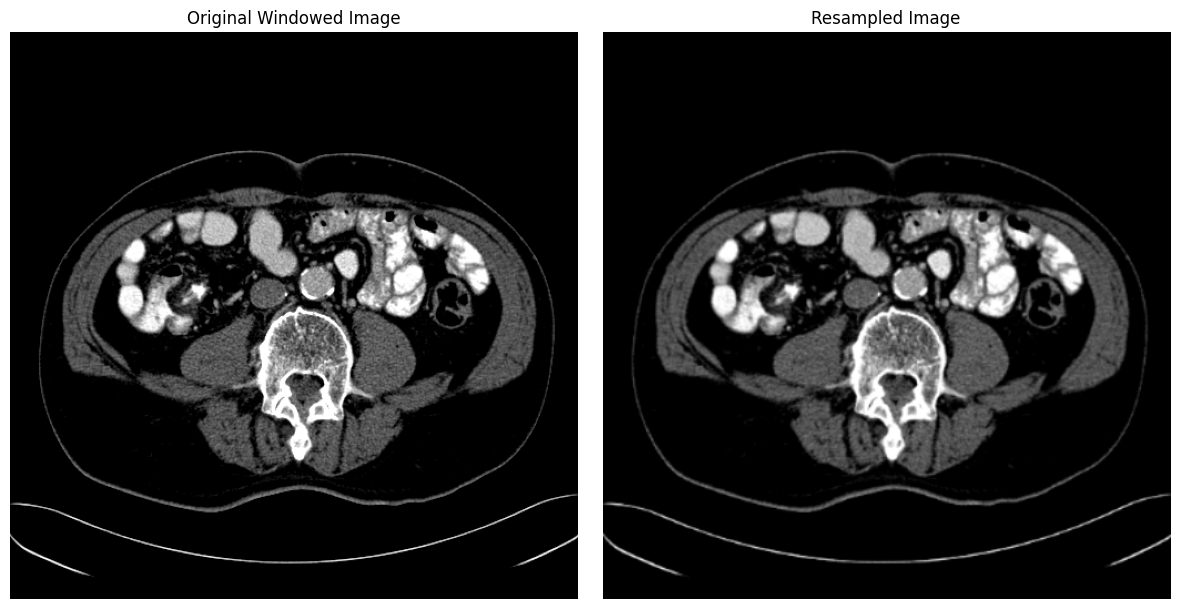

In [37]:
import nibabel as nib
import matplotlib.pyplot as plt

# Define paths for the windowed and resampled images
windowed_file = "D:/kits23/windowed_images/case_00006_windowed.nii.gz"
resampled_file = "D:/kits23/resampled_and_sliced_images/case_00006_windowed.nii.gz_resampled_and_sliced.nii.gz"

# Load the NIfTI files
windowed_obj = nib.load(windowed_file)
resampled_obj = nib.load(resampled_file)

# Extract the data
windowed_data = windowed_obj.get_fdata()
resampled_data = resampled_obj.get_fdata()

# Select a slice to compare (middle slice for example)
slice_index_windowed = windowed_data.shape[0] // 2  # Middle slice of windowed image
slice_index_resampled = resampled_data.shape[0] // 2  # Middle slice of resampled image

windowed_slice = windowed_data[slice_index_windowed, :, :]
resampled_slice = resampled_data[slice_index_resampled, :, :]

# Plot the comparison
plt.figure(figsize=(12, 6))

# Original Windowed Image
plt.subplot(1, 2, 1)
plt.imshow(windowed_slice, cmap="gray")
plt.title("Original Windowed Image")
plt.axis("off")

# Resampled Image
plt.subplot(1, 2, 2)
plt.imshow(resampled_slice, cmap="gray")
plt.title("Resampled Image")
plt.axis("off")

plt.tight_layout()
plt.show()


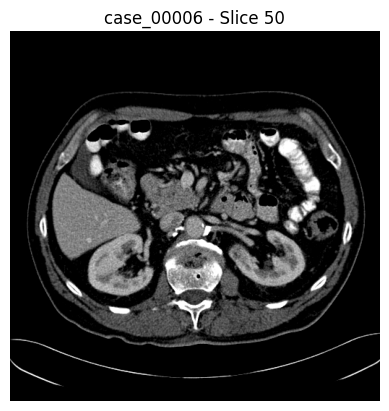

In [39]:
import matplotlib.pyplot as plt
import nibabel as nib
import os

def visualize_windowed_image(case_name, output_path, slice_index):
    """
    Visualize a slice from a windowed NIfTI file.

    Args:
    - case_name (str): The name of the case to visualize.
    - output_path (str): Path to the folder containing windowed NIfTI files.
    - slice_index (int): The slice to visualize.
    """
    # Construct the file path
    windowed_file = os.path.join(output_path, f"{case_name}_windowed.nii.gz")

    # Check if the file exists
    if not os.path.exists(windowed_file):
        print(f"Windowed file not found for {case_name}. Looking at: {windowed_file}")
        return

    # Load the NIfTI file
    windowed_obj = nib.load(windowed_file)
    windowed_data = windowed_obj.get_fdata()

    # Validate slice index
    if slice_index < 0 or slice_index >= windowed_data.shape[0]:
        print(f"Slice index {slice_index} is out of bounds for {case_name}.")
        return

    # Plot the slice
    plt.imshow(windowed_data[slice_index, :, :], cmap='gray')
    plt.title(f"{case_name} - Slice {slice_index}")
    plt.axis('off')
    plt.show()

# Example Usage
output_path = "D:/kits23/windowed_images"  # Update this to the correct path
visualize_windowed_image("case_00006", output_path, slice_index=50)


### Key Observations:
First Code (Visualize Windowed Image):

You explicitly specify a slice_index (e.g., 50).
This slice index determines which slice of the 3D windowed image is visualized.
Second Code (Comparison):

It automatically selects the middle slice (shape[0] // 2) from the 3D volume of the windowed image.
Unless slice_index = 50 happens to be the middle slice (which is unlikely), this would display a different slice than the first code.
What This Means:
The windowed image is a 3D volume, and each slice corresponds to a specific position along the depth axis (e.g., axial slices of a CT scan). The two slices shown by your two codes are simply different views from this 3D volume.

## Summary:
If both codes use the same slice index, the images for the windowed image will match. The current discrepancy arises because each code is visualizing a different slice from the same 3D volume.

Now, let's use the same slice index = 50 in both the above codes...

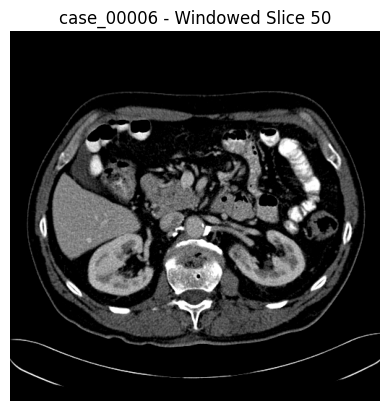

In [40]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

def visualize_windowed_image(case_name, dataset_path, slice_index):
    """
    Visualize a slice from a windowed NIfTI file.

    Args:
    - case_name (str): The name of the case to visualize.
    - dataset_path (str): Path to the folder containing windowed NIfTI files.
    - slice_index (int): The slice index to visualize.
    """
    # Construct file path
    windowed_file = os.path.join(dataset_path, f"{case_name}_windowed.nii.gz")

    if not os.path.exists(windowed_file):
        print(f"Windowed file not found for {case_name}")
        return

    # Load the NIfTI file
    windowed_obj = nib.load(windowed_file)
    windowed_data = windowed_obj.get_fdata()

    # Plot the specified slice
    plt.imshow(windowed_data[slice_index, :, :], cmap='gray')
    plt.title(f"{case_name} - Windowed Slice {slice_index}")
    plt.axis('off')
    plt.show()

# Visualize case 00006 with slice index 50
visualize_windowed_image("case_00006", "D:/kits23/windowed_images/", slice_index=50)


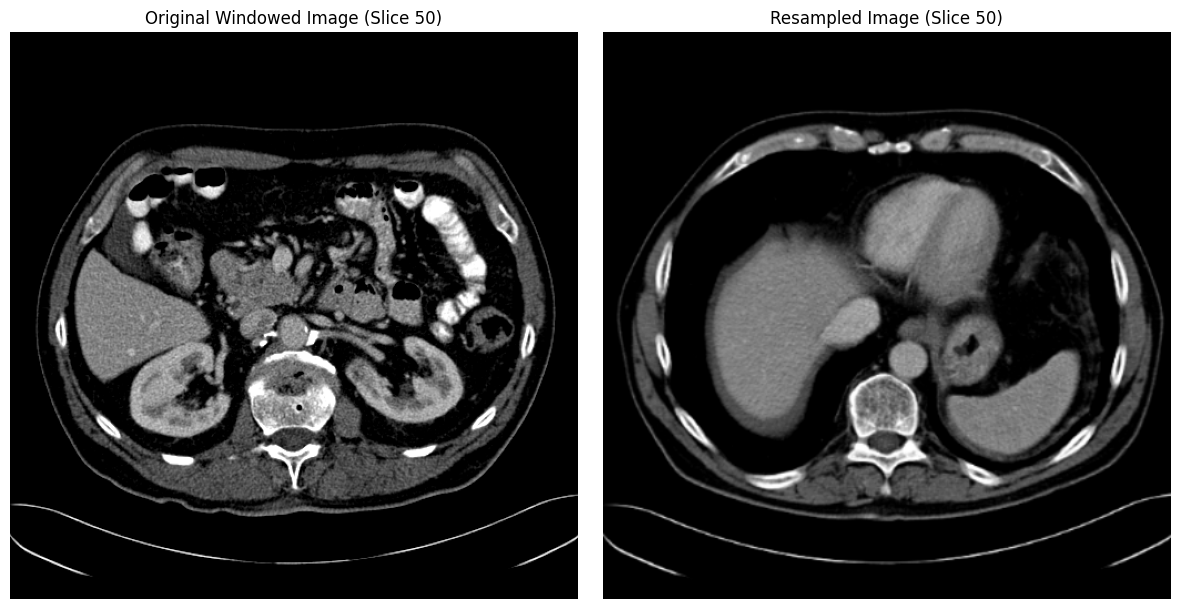

In [41]:
import nibabel as nib
import matplotlib.pyplot as plt

# Define paths for the windowed and resampled images
windowed_file = "D:/kits23/windowed_images/case_00006_windowed.nii.gz"
resampled_file = "D:/kits23/resampled_and_sliced_images/case_00006_windowed.nii.gz_resampled_and_sliced.nii.gz"

# Load the NIfTI files
windowed_obj = nib.load(windowed_file)
resampled_obj = nib.load(resampled_file)

# Extract the data
windowed_data = windowed_obj.get_fdata()
resampled_data = resampled_obj.get_fdata()

# Use the same slice index for both
slice_index = 50

windowed_slice = windowed_data[slice_index, :, :]
resampled_slice = resampled_data[slice_index, :, :]

# Plot the comparison
plt.figure(figsize=(12, 6))

# Original Windowed Image
plt.subplot(1, 2, 1)
plt.imshow(windowed_slice, cmap="gray")
plt.title("Original Windowed Image (Slice 50)")
plt.axis("off")

# Resampled Image
plt.subplot(1, 2, 2)
plt.imshow(resampled_slice, cmap="gray")
plt.title("Resampled Image (Slice 50)")
plt.axis("off")

plt.tight_layout()
plt.show()


Now that we same some discrepancies and unclear visuals.. let's stick to the original slice indices used for resampling...

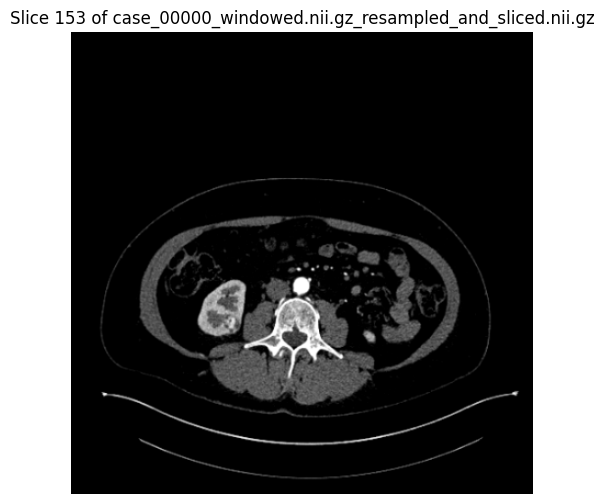

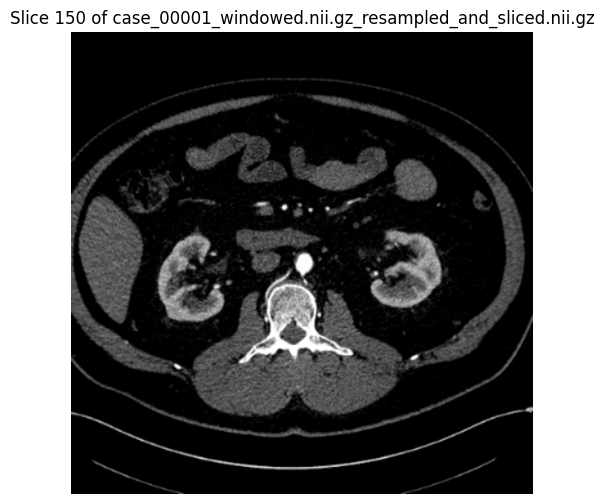

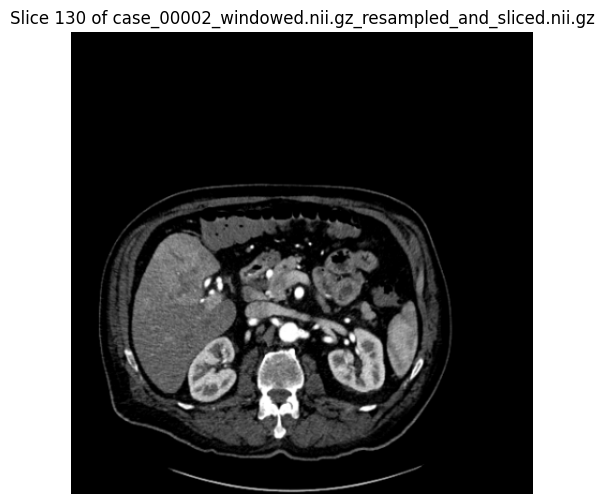

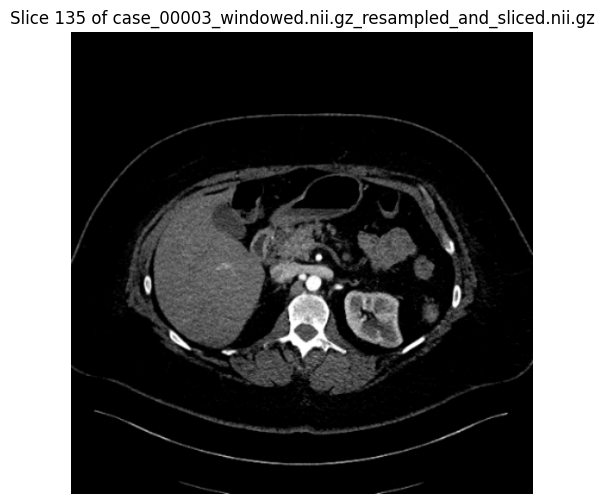

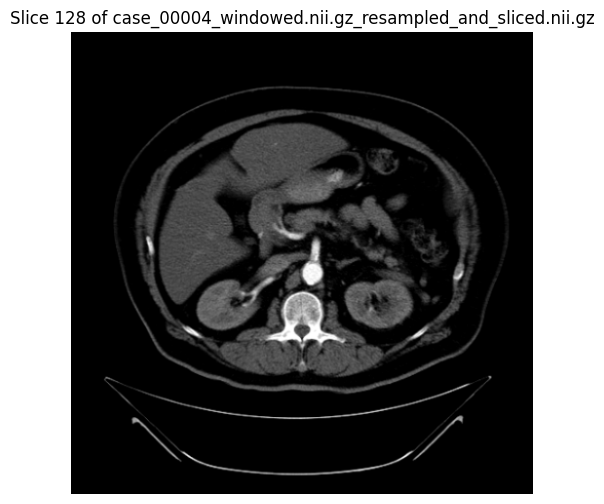

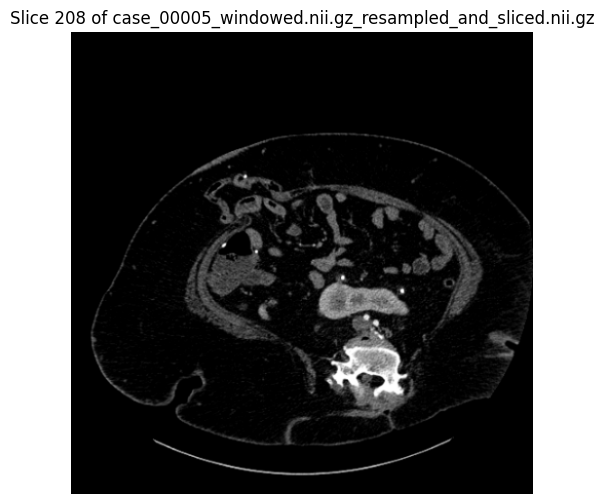

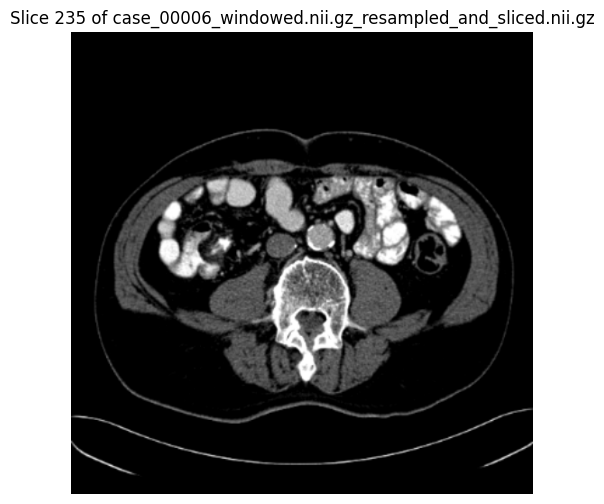

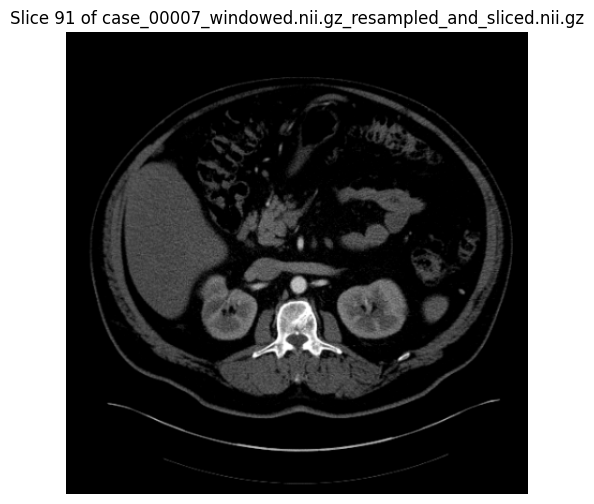

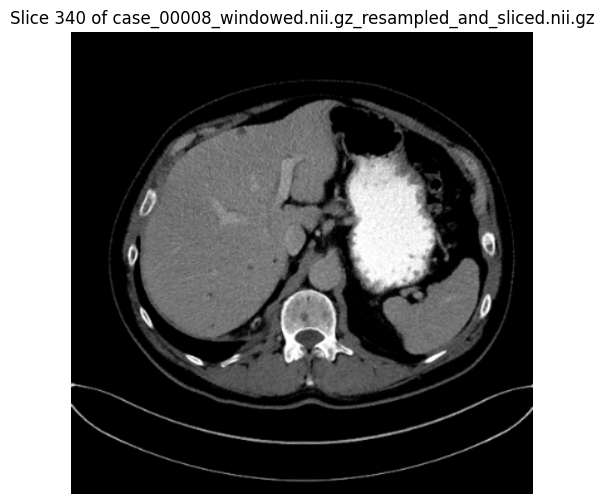

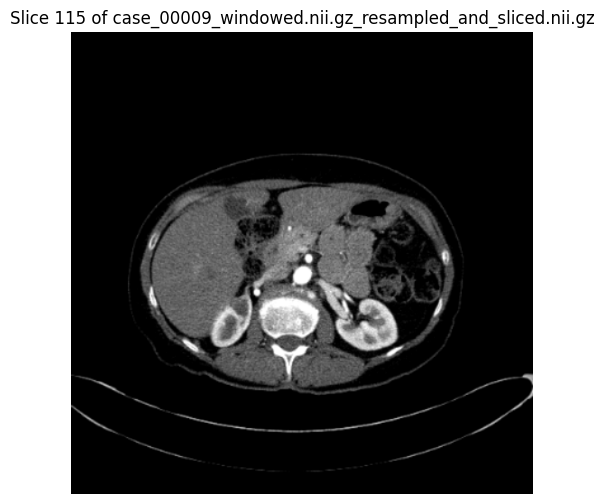

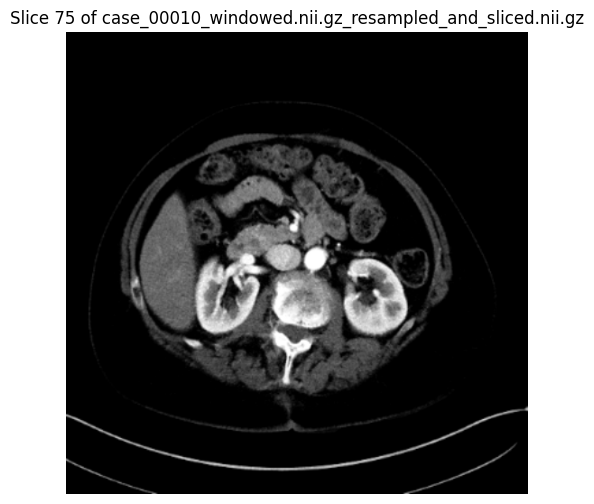

In [42]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

# Define the directory containing the processed files
processed_path = "D:/kits23/resampled_and_sliced_images/"

# Define the range of case numbers to visualize (00000 to 00010)
case_range = range(0, 11)  # First 11 cases (00000 to 00010)

# Loop through each case in the range
for case_num in case_range:
    # Format the case name with leading zeros
    case_name = f"case_{case_num:05d}_windowed.nii.gz_resampled_and_sliced.nii.gz"
    case_file = os.path.join(processed_path, case_name)

    # Check if the file exists
    if not os.path.exists(case_file):
        print(f"File not found: {case_file}")
        continue

    # Load the NIfTI file
    nifti_obj = nib.load(case_file)
    slices_data = nifti_obj.get_fdata()

    # Select the middle slice for visualization
    slice_index = slices_data.shape[0] // 2  # Pick the middle slice
    slice_data = slices_data[slice_index, :, :]  # Extract the 2D slice

    # Plot the slice
    plt.figure(figsize=(6, 6))
    plt.imshow(slice_data, cmap="gray")
    plt.title(f"Slice {slice_index} of {case_name}")
    plt.axis("off")
    plt.show()


In [43]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

# Define paths
processed_path = "D:/kits23/resampled_and_sliced_images/"
output_visualization_path = "D:/kits23/resampled_visualizations/"  # Folder for saving visualizations
progress_file_path = "D:/kits23/resampled_visualizations/resampled_progress.txt"  # Progress file

# Create the output folder if it doesn't exist
os.makedirs(output_visualization_path, exist_ok=True)

# Open a progress file to track the processed cases
with open(progress_file_path, "w") as progress_file:
    # Define the range of case numbers to visualize (00000 to 00010)
    case_range = range(0, 11)  # First 11 cases (00000 to 00010)

    # Loop through each case in the range
    for case_num in case_range:
        # Format the case name with leading zeros
        case_name = f"case_{case_num:05d}_windowed.nii.gz_resampled_and_sliced.nii.gz"
        case_file = os.path.join(processed_path, case_name)

        # Check if the file exists
        if not os.path.exists(case_file):
            progress_file.write(f"File not found: {case_file}\n")
            print(f"File not found: {case_file}")
            continue

        # Load the NIfTI file
        nifti_obj = nib.load(case_file)
        slices_data = nifti_obj.get_fdata()

        # Select the middle slice for visualization
        slice_index = slices_data.shape[0] // 2  # Pick the middle slice
        slice_data = slices_data[slice_index, :, :]  # Extract the 2D slice

        # Plot the slice
        plt.figure(figsize=(6, 6))
        plt.imshow(slice_data, cmap="gray")
        plt.title(f"Slice {slice_index} of {case_name}")
        plt.axis("off")

        # Save the plot as an image file in the resampled_visualizations folder
        visualization_file = os.path.join(output_visualization_path, f"{case_name}_slice_{slice_index}.png")
        plt.savefig(visualization_file, bbox_inches='tight')
        plt.close()

        # Write progress to the progress file
        progress_file.write(f"Processed: {case_name}, Slice {slice_index} visualized and saved as {visualization_file}\n")

        print(f"Processed {case_name}, visualization saved as {visualization_file}")


Processed case_00000_windowed.nii.gz_resampled_and_sliced.nii.gz, visualization saved as D:/kits23/resampled_visualizations/case_00000_windowed.nii.gz_resampled_and_sliced.nii.gz_slice_153.png
Processed case_00001_windowed.nii.gz_resampled_and_sliced.nii.gz, visualization saved as D:/kits23/resampled_visualizations/case_00001_windowed.nii.gz_resampled_and_sliced.nii.gz_slice_150.png
Processed case_00002_windowed.nii.gz_resampled_and_sliced.nii.gz, visualization saved as D:/kits23/resampled_visualizations/case_00002_windowed.nii.gz_resampled_and_sliced.nii.gz_slice_130.png
Processed case_00003_windowed.nii.gz_resampled_and_sliced.nii.gz, visualization saved as D:/kits23/resampled_visualizations/case_00003_windowed.nii.gz_resampled_and_sliced.nii.gz_slice_135.png
Processed case_00004_windowed.nii.gz_resampled_and_sliced.nii.gz, visualization saved as D:/kits23/resampled_visualizations/case_00004_windowed.nii.gz_resampled_and_sliced.nii.gz_slice_128.png
Processed case_00005_windowed.nii.g

In [44]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

# Define paths
processed_path = "D:/kits23/resampled_and_sliced_images/"  # Folder with resampled images
output_visualization_path = "D:/kits23/resampled_visualizations/"  # Folder for saving visualizations
progress_file_path = "D:/kits23/resampled_visualizations/resampled_progress.txt"  # Progress file

# Create the output folder if it doesn't exist
os.makedirs(output_visualization_path, exist_ok=True)

# Open the progress file to track the processed cases
with open(progress_file_path, "w") as progress_file:
    # Loop through each file in the processed directory
    for case_name in sorted(os.listdir(processed_path)):
        if not case_name.endswith('_resampled_and_sliced.nii.gz'):
            continue

        case_file = os.path.join(processed_path, case_name)

        # Check if the file exists
        if not os.path.exists(case_file):
            progress_file.write(f"File not found: {case_file}\n")
            print(f"File not found: {case_file}")
            continue

        # Load the NIfTI file
        nifti_obj = nib.load(case_file)
        slices_data = nifti_obj.get_fdata()

        # Select the middle slice for visualization
        slice_index = slices_data.shape[0] // 2  # Pick the middle slice
        slice_data = slices_data[slice_index, :, :]  # Extract the 2D slice

        # Plot the slice
        plt.figure(figsize=(6, 6))
        plt.imshow(slice_data, cmap="gray")
        plt.title(f"Slice {slice_index} of {case_name}")
        plt.axis("off")

        # Save the plot as an image file in the resampled_visualizations folder
        visualization_file = os.path.join(output_visualization_path, f"{case_name}_slice_{slice_index}.png")
        plt.savefig(visualization_file, bbox_inches='tight')
        plt.close()

        # Write progress to the progress file
        progress_file.write(f"Processed: {case_name}, Slice {slice_index} visualized and saved as {visualization_file}\n")

        print(f"Processed {case_name}, visualization saved as {visualization_file}")

print("All visualizations have been processed and saved.")


Processed case_00000_windowed.nii.gz_resampled_and_sliced.nii.gz, visualization saved as D:/kits23/resampled_visualizations/case_00000_windowed.nii.gz_resampled_and_sliced.nii.gz_slice_153.png
Processed case_00001_windowed.nii.gz_resampled_and_sliced.nii.gz, visualization saved as D:/kits23/resampled_visualizations/case_00001_windowed.nii.gz_resampled_and_sliced.nii.gz_slice_150.png
Processed case_00002_windowed.nii.gz_resampled_and_sliced.nii.gz, visualization saved as D:/kits23/resampled_visualizations/case_00002_windowed.nii.gz_resampled_and_sliced.nii.gz_slice_130.png
Processed case_00003_windowed.nii.gz_resampled_and_sliced.nii.gz, visualization saved as D:/kits23/resampled_visualizations/case_00003_windowed.nii.gz_resampled_and_sliced.nii.gz_slice_135.png
Processed case_00004_windowed.nii.gz_resampled_and_sliced.nii.gz, visualization saved as D:/kits23/resampled_visualizations/case_00004_windowed.nii.gz_resampled_and_sliced.nii.gz_slice_128.png
Processed case_00005_windowed.nii.g